### 1. Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from geopy.geocoders import Nominatim

#import datetime 
import datetime

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [2]:
clients_data = pd.read_csv("clientDataClean.csv",index_col=0)

In [3]:
clients_data

,first_name,last_name,email,gender,username,date_of_birth,nationality,city,travel_car,drinks_alcohol,...,favourite_food,dislike_food,personality,preferred_payment,restaurant_style,cuisine_type,lunch_hour,dinner_hour,normal_price_range,smoker_n
0,Örjan,Douberday,wdouberday0@google.com.br,Male,mdouberday0,1961-01-17 00:12:00,Portuguese,Setúbal,False,False,...,arroz de pato,sopa de tomate,mindful,MBWay,familiar,seafood,13:00 - 14:00,19:00 - 20:00,13.0,False
1,Céline,Milmo,lmilmo1@naver.com,Male,lmilmo1,1986-01-02 00:11:00,Portuguese,Setúbal,True,False,...,cheesecake,bitoque,mindful,Cash,after work,portuguese,13:00 - 14:00,21:00 - 22:00,15.0,False
2,Bérénice,McCaughey,jmccaughey2@blogs.com,Male,kmccaughey2,1991-01-10 00:05:00,Portuguese,Porto,True,True,...,pasta,arroz de pato,foodie,Credit Card,after work,mediterranean,12 :00 - 13:00,18 :00 - 19:00,13.0,False
3,Gaëlle,O'Hickey,gohickey3@biblegateway.com,Male,kohickey3,1974-01-21 00:10:00,Portuguese,Coimbra,False,True,...,filetes de pescada,ceviche,foodie,MBWay,after work,portuguese,13:00 - 14:00,20:00 - 21:00,26.0,False
4,Yáo,O'Sheilds,aosheilds4@pbs.org,Female,hosheilds4,1969-01-05 00:01:00,Portuguese,Leiria,False,True,...,tacos,salada de frutas,social,MBWay,homemade,meat cuisine,13:00 - 14:00,19:00 - 20:00,20.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Vérane,Rayner,mraynerro@icio.us,Male,braynerro,1977-01-06 00:04:00,Portuguese,Castelo Branco,False,False,...,bacalhau a gomes de sa,pasta,social,MBWay,homemade,mediterranean,14:00 - 15:00,19:00 - 20:00,20.0,False
997,Jú,Boyd,rboydrp@github.com,Male,sboydrp,1970-01-16 00:09:00,Portuguese,Faro,True,False,...,pimentos,croissant,comfort,Credit Card,traditional,mediterranean,12 :00 - 13:00,19:00 - 20:00,13.0,False
998,Françoise,Laudham,blaudhamrq@squarespace.com,Female,hlaudhamrq,1962-01-18 00:03:00,Portuguese,Porto,False,True,...,bacalhau à zé do pipo,filetes de pescada,comfort,MBWay,view,international,13:00 - 14:00,19:00 - 20:00,26.0,False
999,Andréa,Sinyard,csinyardrr@disqus.com,Male,fsinyardrr,1986-01-09 00:01:00,Portuguese,Lisbon,True,True,...,bacalhau a bras,lasanha,foodie,Cash,fine dining,pizzeria,12 :00 - 13:00,19:00 - 20:00,13.0,False


In [4]:
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1000
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   first_name            1001 non-null   object 
 1   last_name             1001 non-null   object 
 2   email                 1001 non-null   object 
 3   gender                1001 non-null   object 
 4   username              1001 non-null   object 
 5   date_of_birth         1001 non-null   object 
 6   nationality           1001 non-null   object 
 7   city                  1001 non-null   object 
 8   travel_car            1001 non-null   bool   
 9   drinks_alcohol        1001 non-null   bool   
 10  dietary_restrictions  1001 non-null   object 
 11  allergies             1001 non-null   object 
 12  favourite_food        983 non-null    object 
 13  dislike_food          980 non-null    object 
 14  personality           1001 non-null   object 
 15  preferred_payment     1001

In [5]:
clients_data.isna().sum()

first_name                0
last_name                 0
email                     0
gender                    0
username                  0
date_of_birth             0
nationality               0
city                      0
travel_car                0
drinks_alcohol            0
dietary_restrictions      0
allergies                 0
favourite_food           18
dislike_food             21
personality               0
preferred_payment         0
restaurant_style          0
cuisine_type            109
lunch_hour                0
dinner_hour               0
normal_price_range        0
smoker_n                  0
dtype: int64

### 2. Pre-processing

In [6]:
#normal price as integer
clients_data['normal_price_range'] = clients_data['normal_price_range'].astype(int)

In [7]:
# Define the number of bins you want (e.g., 3 bins)
num_bins = 3

# Create bins with equal quantiles
clients_data['normal_price_range'] = pd.qcut(clients_data['normal_price_range'], q=num_bins, labels=False)

# Add 1 to the labels to start from 1 instead of 0
clients_data['normal_price_range'] = clients_data['normal_price_range'] + 1

In [8]:
# Replace 'brazillian' with 'brazilian' in the 'nationality' column
clients_data['nationality'] = clients_data['nationality'].replace('Brazillian', 'Brazilian')

In [9]:
#alterar input nossas observações
clients_data.drop(1000, inplace=True)



#Calculating Age
current_date = datetime.date.today()

clients_data['date_of_birth'] = pd.to_datetime(clients_data['date_of_birth'], format='%Y-%m-%d %H:%M:%S')
clients_data['date_of_birth'] = clients_data['date_of_birth'].dt.date

clients_data['age'] = ((current_date - clients_data['date_of_birth'])/ pd.Timedelta(days=365)).astype(int)


In [10]:
clients_data['lunch_hour'] = clients_data['lunch_hour'].str.extract(r'(\d{2})').astype(int)
clients_data['dinner_hour'] = clients_data['dinner_hour'].str.extract(r'(\d{2})').astype(int)

In [11]:
# Transform 'smoker_n' into binary
clients_data['smoker_n'] = clients_data['smoker_n'].astype(int)

In [12]:
# Transform 'travel_car' into binary
clients_data['travel_car'] = clients_data['travel_car'].astype(int)

In [13]:
# Transform 'drinks_alcohol' into binary
clients_data['drinks_alcohol'] = clients_data['drinks_alcohol'].astype(int)

In [14]:
def has_allergies(allergies):
    if allergies == "none":
        return 0
    else:
        return 1#Transform 'allergies' to binary (0 - No allergies, 1 - Has allergies)
clients_data['allergies'] = clients_data['allergies'].apply(has_allergies)

In [15]:


# Function to get the latitude and longitude of a city
def geocode_city(city):
    location = geolocator.geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None


In [16]:
# Initialize the geolocator
geolocator = Nominatim(user_agent="city_locator")

#Apply function geocode_city
clients_data['city_latitude'], clients_data['city_longitude'] = zip(*clients_data['city'].apply(geocode_city))

#Drop feature 'city'
clients_data.drop(['city'], axis=1, inplace=True)

In [17]:
latitude, longitude = clients_data['city_latitude'], clients_data['city_longitude']

In [18]:
cuisine_types_to_remove = ['greek', 'chinese', 'fusion', 'african', 'meat', 'vegetarian', 'grilled']
clients_data = clients_data[~clients_data['cuisine_type'].isin(cuisine_types_to_remove)]

In [19]:
restaurant_style_to_remove = ['nightlife', 'breakfast', 'romantic', 'organic', 'friendly', 'ceremony', 'oceanfront','wine bar','business']
clients_data = clients_data[~clients_data['restaurant_style'].isin(restaurant_style_to_remove)]

In [20]:
condition= clients_data['nationality'].isin(['Angolan','Cape Verdean', 'French', 'German'])
clients_data.drop(clients_data[condition].index, inplace = True)

In [21]:
#Transform 'American Express', 'Maestro Card', 'Mastercard','Visa' and 'Visa Electron' to Credit Carr
clients_data['preferred_payment'].replace(['American Express','Mastercard', 'Maestro Card', 'Visa', 'Visa Electron'],'Credit Card', inplace = True)


In [22]:
#Drop 'Apple Pay' and 'Paypal'
condition = clients_data['preferred_payment'].isin(['Apple Pay','Paypal'])
clients_data.drop(clients_data[condition].index, inplace = True)

### 2. Visulization

In [23]:
def plot_variable_distribution_by_personality(data, variable_name, personality_column):
    
    pivot_table = pd.crosstab(clients_data[variable_name], clients_data['personality'])

    # Calculate the percentage by normalizing within each age group
    pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

    # Plot a stacked bar chart
    pivot_table_percentage.plot(kind='bar', stacked=True)


    # Set labels and title
    plt.xlabel(personality_column)
    plt.ylabel("Percentage")
    plt.title(f"Percentage Distribution of {variable_name} by Personality")

    

    plt.show()

In [24]:
def plot_variable_distribution(data, variable_name, personality_column):
    
    pivot_table = pd.crosstab(clients_data[variable_name], clients_data['personality'])

    # Calculate the percentage by normalizing within each age group
    pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

    # Plot a stacked bar chart
    pivot_table.plot(kind='bar', stacked=True)


    # Set labels and title
    plt.xlabel(personality_column)
    plt.ylabel("Count")
    plt.title(f" Distribution of {variable_name} by Personality")

    

    plt.show()

In [28]:
columns_to_plot = ['gender', 'nationality', 'travel_car', 'drinks_alcohol',
       'dietary_restrictions', 'allergies', 'preferred_payment', 'restaurant_style', 'cuisine_type',
       'lunch_hour', 'dinner_hour', 'normal_price_range', 'smoker_n', 'age',
       'city_latitude', 'city_longitude']

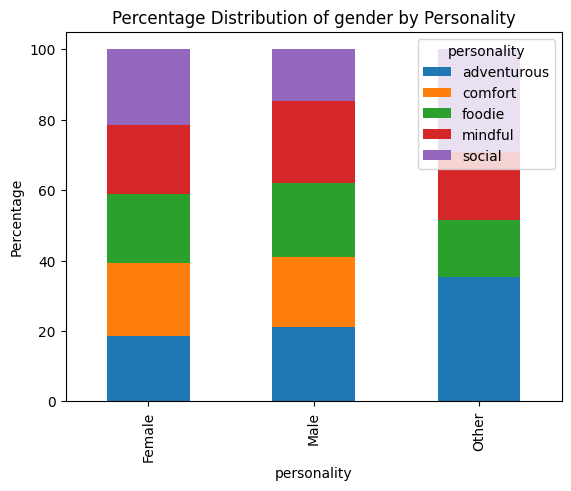

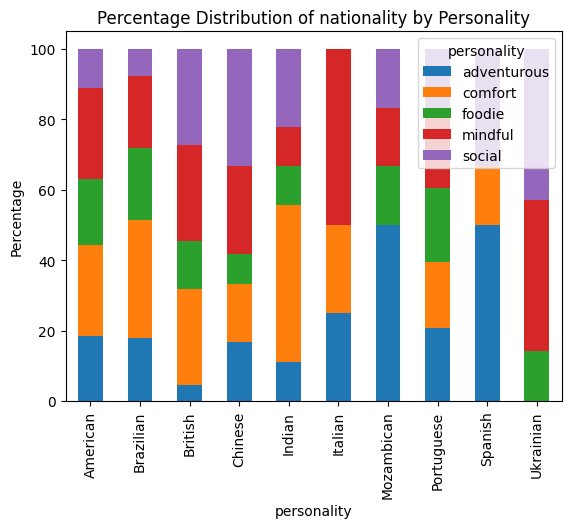

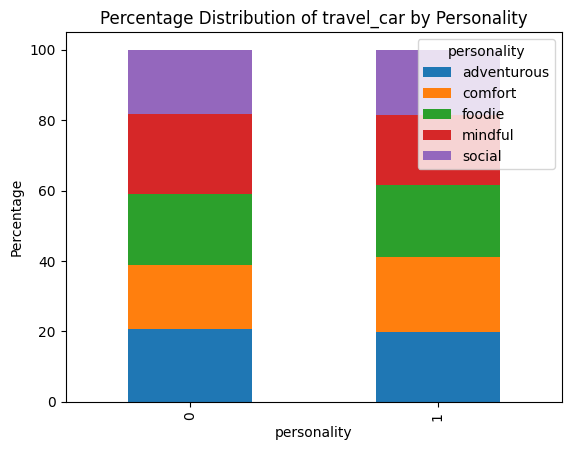

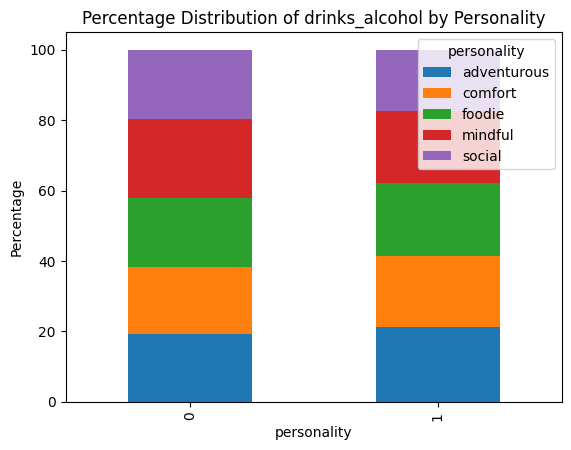

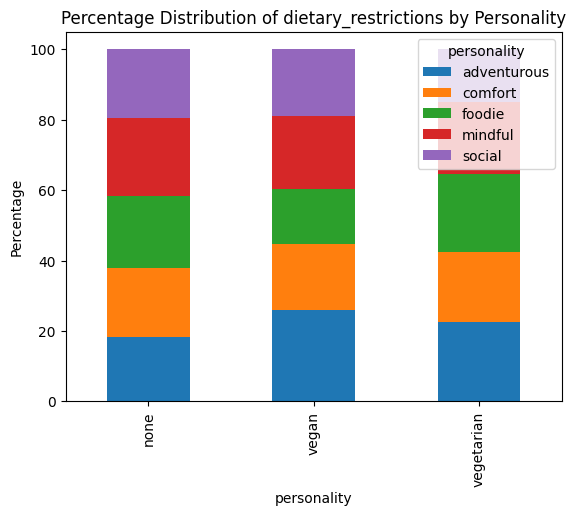

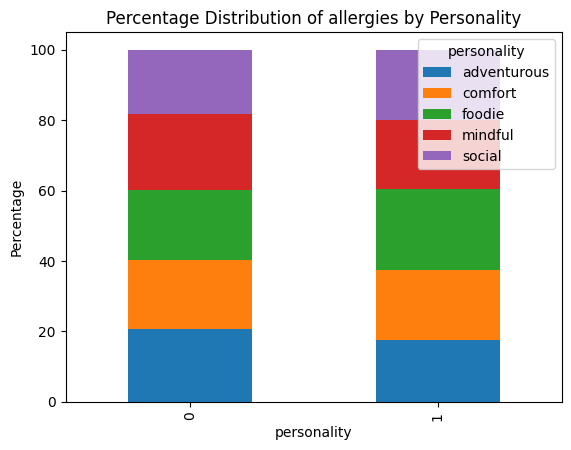

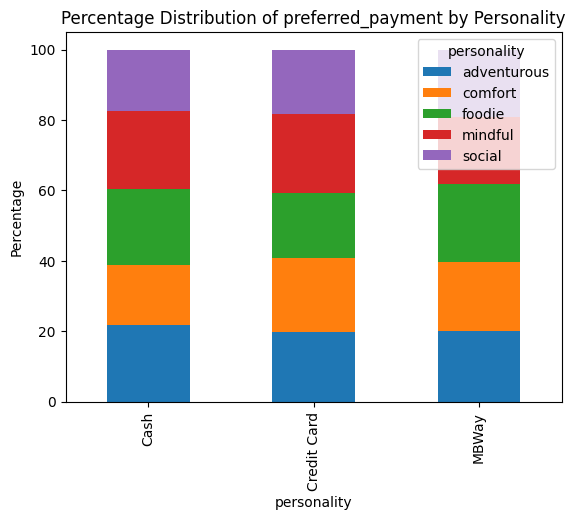

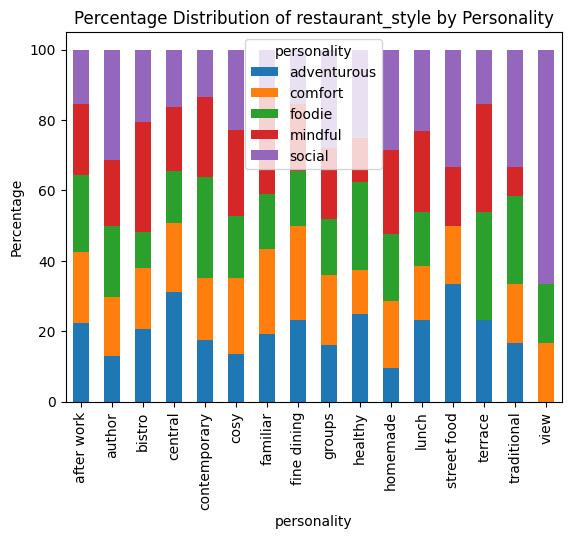

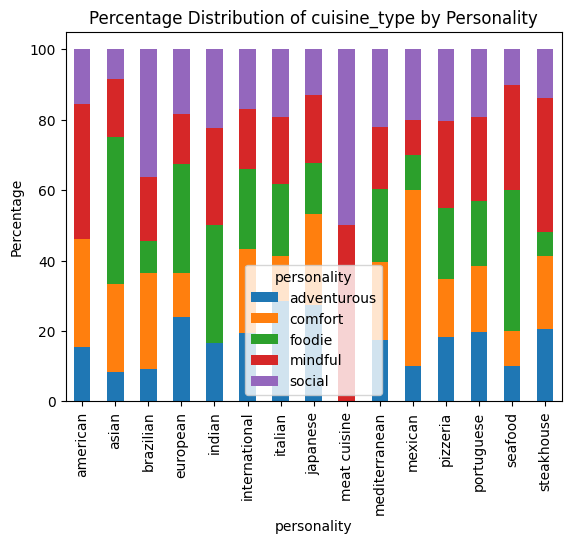

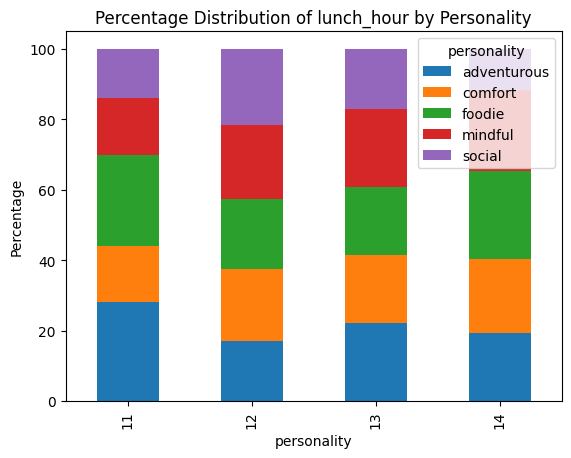

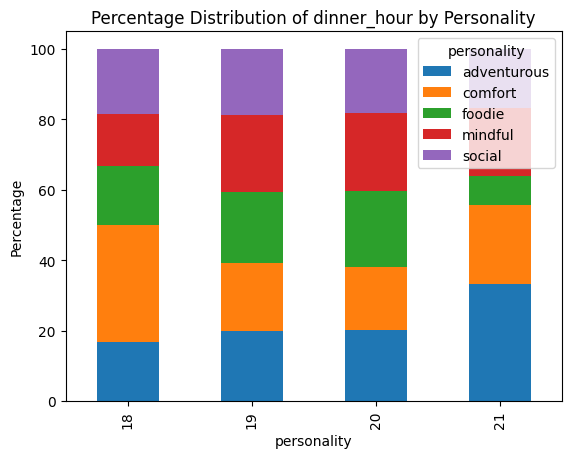

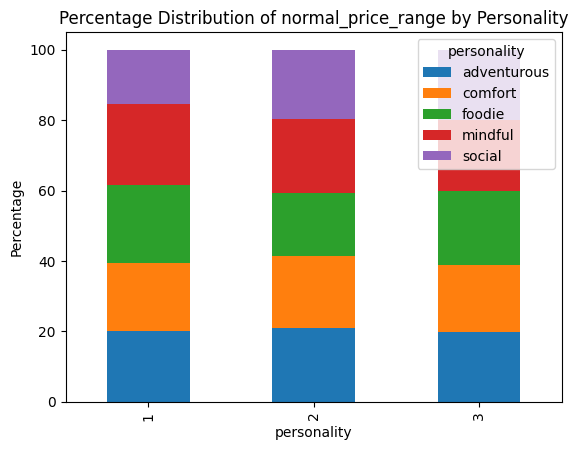

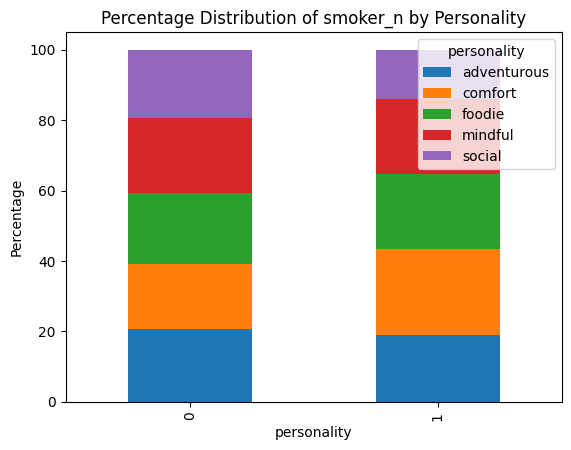

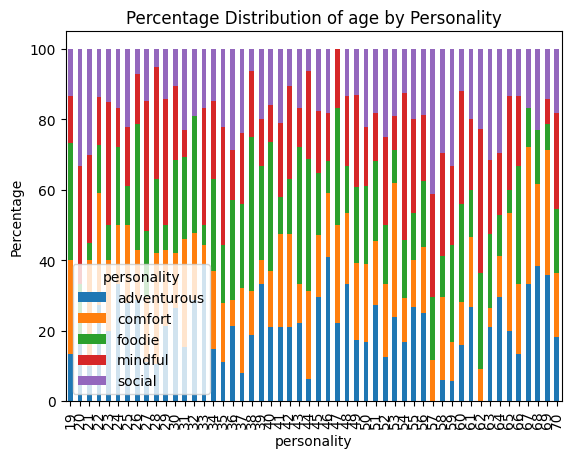

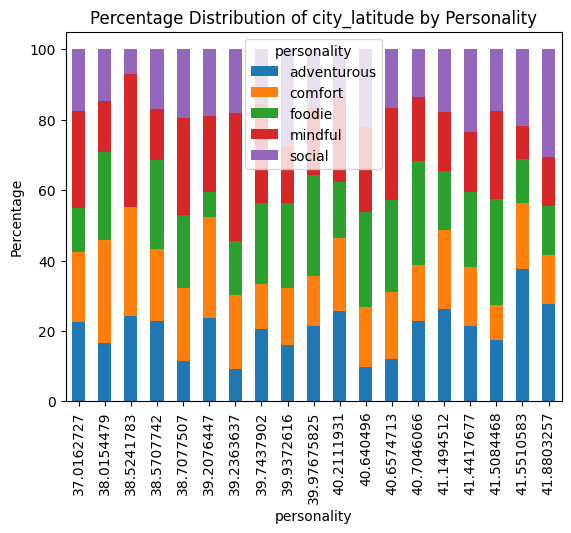

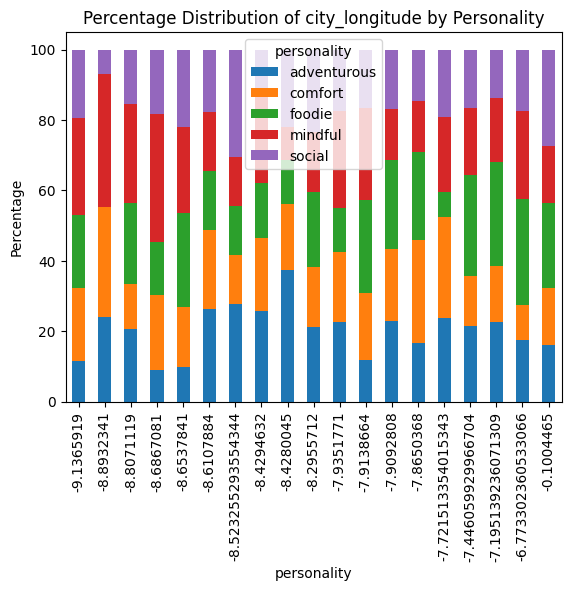

In [29]:
for column in columns_to_plot:
    # plot_variable_distribution(clients_data, column, 'personality')
    plot_variable_distribution_by_personality(clients_data, column, 'personality')

In [32]:
clients_data.drop(['travel_car','drinks_alcohol', 'dietary_restrictions', 'allergies', 'preferred_payment', 'lunch_hour', 'dinner_hour', 'normal_price_range', 'smoker_n'], axis=1, inplace=True)

### Get dummies

In [33]:
#Encoding gender
clients_data = pd.get_dummies(clients_data, columns=['gender'], prefix='gender')
clients_data.drop('gender_Female', axis=1, inplace=True)

# Transform boolean outputs into binary
clients_data['gender_Male'] = clients_data['gender_Male'].astype(int)
clients_data['gender_Other'] = clients_data['gender_Other'].astype(int)

In [34]:
#Encoding dietary_restrictions
# clients_data = pd.get_dummies(clients_data, columns=['dietary_restrictions'])
# clients_data.drop('dietary_restrictions_none', axis=1, inplace=True)

# Transform boolean outputs into binary
# clients_data['dietary_restrictions_vegan'] = clients_data['dietary_restrictions_vegan'].astype(int)
# clients_data['dietary_restrictions_vegetarian'] = clients_data['dietary_restrictions_vegetarian'].astype(int)

In [35]:
#Encoding gender preferred_payment
# clients_data = pd.get_dummies(clients_data, columns=['preferred_payment'])
# clients_data.drop('preferred_payment_Cash', axis=1, inplace=True)

# Transform boolean outputs into binary
# clients_data['preferred_payment_Credit Card'] = clients_data['preferred_payment_Credit Card'].astype(int)
# clients_data['preferred_payment_MBWay'] = clients_data['preferred_payment_MBWay'].astype(int)

### 3. Feature Selection

In [36]:
clients_data.columns

Index(['nationality', 'personality', 'restaurant_style', 'cuisine_type', 'age',
       'city_latitude', 'city_longitude', 'gender_Male', 'gender_Other'],
      dtype='object')

In [35]:
clients_data.drop(['first_name','last_name','username', 'email','date_of_birth', 'favourite_food', 'dislike_food'], axis=1, inplace=True)

In [47]:
clients_data.head()

,nationality,personality,restaurant_style,cuisine_type,age,city_latitude,city_longitude,gender_Male,gender_Other
0,Portuguese,mindful,familiar,seafood,62,38.524178,-8.893234,1,0
1,Portuguese,mindful,after work,portuguese,37,38.524178,-8.893234,1,0
2,Portuguese,foodie,after work,mediterranean,32,41.149451,-8.610788,1,0
3,Portuguese,foodie,after work,portuguese,49,40.211193,-8.429463,1,0
4,Portuguese,social,homemade,meat cuisine,54,39.743790,-8.807112,0,0


### 5. Split in training and test set

In [43]:
X = clients_data.drop(['personality'], axis=1)
y = clients_data['personality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

### 6.Label encoding

In [48]:
label_encoder1 = LabelEncoder()
# Apply label encoding to X_train
X_train['restaurant_style'] = label_encoder1.fit_transform(X_train['restaurant_style'])
# Apply label encoding to X_test using the same label encoders
X_test['restaurant_style'] = label_encoder1.transform(X_test['restaurant_style'])

In [49]:
label_encoder2 = LabelEncoder()
# Apply label encoding to X_train
X_train['cuisine_type'] = label_encoder2.fit_transform(X_train['cuisine_type'])
# Apply label encoding to X_test using the same label encoders
X_test['cuisine_type'] = label_encoder2.transform(X_test['cuisine_type'])

In [50]:
label_encoder3 = LabelEncoder()
# Apply label encoding to X_train
X_train['nationality'] = label_encoder3.fit_transform(X_train['nationality'])
# Apply label encoding to X_test using the same label encoders
X_test['nationality'] = label_encoder3.transform(X_test['nationality'])

In [51]:
label_encoder4 = LabelEncoder()
# Apply label encoding to y_train
y_train = label_encoder4.fit_transform(y_train)

# Apply label encoding to y_test using the same label encoders
y_test = label_encoder4.transform(y_test)

### 7. Train the model

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


#Train the model
model = DecisionTreeClassifier() 
model.fit(X_train, y_train)

#Make predictions on the test data
y_pred = model.predict(X_test)




accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Classification Report:\n", report)



# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train)

print("Training Accuracy:", train_accuracy)
print("Classification Report:\n", train_report)



Accuracy: 0.19895287958115182
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.24      0.25        38
           1       0.20      0.16      0.18        38
           2       0.22      0.24      0.23        41
           3       0.17      0.19      0.18        37
           4       0.14      0.16      0.15        37

    accuracy                           0.20       191
   macro avg       0.20      0.20      0.20       191
weighted avg       0.20      0.20      0.20       191

Training Accuracy: 0.9934383202099738
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00       149
           2       1.00      1.00      1.00       152
           3       1.00      1.00      1.00       167
           4       1.00      1.00      1.00       138

    accuracy                           1.00       762
   macro avg   

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree classifier
model = DecisionTreeClassifier()

# Define a set of hyperparameters to search through
param_grid = {
    'max_depth': [None, 3,4,5,6,7,8,9,10],  # Adjust the maximum depth of the tree
    'min_samples_split': [ 12, 15, 17, 20],    # Adjust the minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4,5,6,7,8]       # Adjust the minimum number of samples required to be in a leaf node
}

# Create a Grid Search CV object
grid_search = GridSearchCV(model, param_grid, cv=5)  # You can adjust the number of cross-validation folds (cv)

# Fit the model with hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator (model with the best hyperparameters)
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report for the test data
report = classification_report(y_test, y_pred)

print("Best Model Hyperparameters:", best_model)
print("Test Set Accuracy:", accuracy)
print("Classification Report:\n", report)


# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train)

print("Training Accuracy:", train_accuracy)
print("Classification Report:\n", train_report)



Best Model Hyperparameters: DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=15)
Test Set Accuracy: 0.17801047120418848
Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.34      0.22        38
           1       0.08      0.03      0.04        38
           2       0.23      0.12      0.16        41
           3       0.20      0.16      0.18        37
           4       0.20      0.24      0.22        37

    accuracy                           0.18       191
   macro avg       0.17      0.18      0.16       191
weighted avg       0.17      0.18      0.16       191

Training Accuracy: 0.9934383202099738
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00       149
           2       1.00      1.00      1.00       152
           3       1.00      1.00      1.00       167
         